In [1]:
import numpy as np
import pandas as pd
import json
import glob
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
sns.set_style("darkgrid")

In [166]:
sns.set_context(font_scale=2)

In [3]:
files = glob.glob("./results/*.json")

In [5]:
for file in files:
    with open(file, "r") as f:
        data = json.load(f)
    break

In [51]:
models = []
source_domains = []
distributions = []
f_scores = []

In [52]:
count = 0
for file in files:
    with open(file, "r") as f:
        data = json.load(f)
    for task in data.keys():
        for model in data[task].keys():
            for source in data[task][model]:
                scores = []
                for target in data[task][model][source].keys():
                    count += 1
                    if source==target:
                        f1 = round(data[task][model][source][target].get("f1"), 4)
                        models.append(model.split("-")[0])
                        source_domains.append(source)
                        distributions.append("iid")
                        f_scores.append(f1)

                    else:
                        f1 = round(data[task][model][source][target].get("f1"), 4)
                        scores.append(f1)
                models.append(model.split("-")[0])
                source_domains.append(source)
                distributions.append("ood")
                f_scores.append(np.mean(scores))

        #         break
        #     break
        # break


In [53]:
count

64

In [54]:
tips = sns.load_dataset("tips")


In [55]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [56]:
df = pd.DataFrame(
    data={
        "model":models,
        "domain":source_domains,
        "distribution":distributions,
        "macro-f1":f_scores,
    }
)

In [57]:
df.head()

,model,domain,distribution,macro-f1
0,bert,books,iid,0.829800
1,bert,books,ood,0.816967
2,bert,dvd,iid,0.850000
3,bert,dvd,ood,0.820300
4,bert,electronics,iid,0.862800


In [215]:
sns.set_context("paper", rc={"font.size":10,"axes.titlesize":10,"axes.labelsize":10})   


In [218]:
sns.set(font_scale = 1.2)

In [292]:
df['macro-f1'] = df['macro-f1']*100

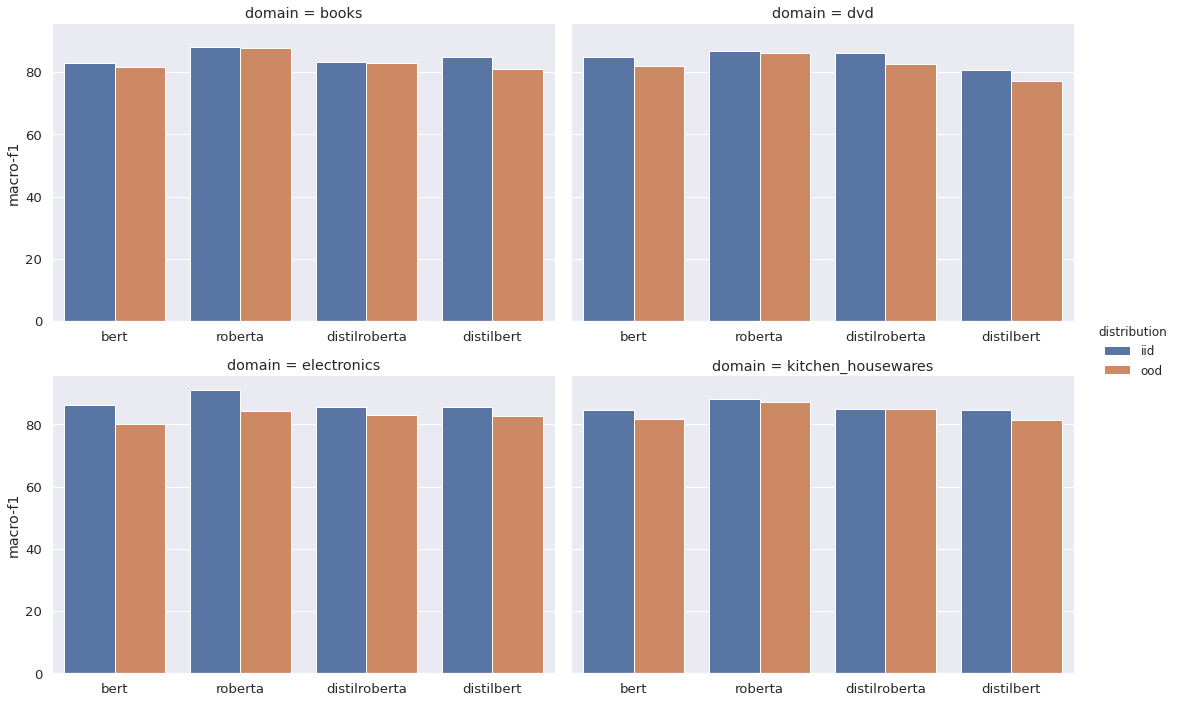

In [322]:
# plt.figure(figsize=(16,16))
ax = sns.catplot(x="model", y="macro-f1",hue="distribution", col="domain", col_wrap=2,data=df, sharex=False, kind="bar",height=5, aspect=1.5, alpha=1.0);
# ax.set_titles(fontsize=40)
plt.setp(ax._legend.get_title(), fontsize=12)
plt.setp(ax._legend.get_texts(), fontsize=12)
ax.set_xlabels(label="")
# ax.set_ylabels(label="")
plt.show()

In [221]:
### Agregate performance drop

In [297]:
models = []
f1_scores = []
distributions = []
model_name = []
prformance_drop = []
for model in np.unique(list(df['model'].values)):
    models.append(model)
    iid_f1 = np.mean(list(df[df['model']==model][df['distribution']=="iid"]['macro-f1']))
    f1_scores.append(iid_f1)
    distributions.append('iid')
    ood_f1 = np.mean(list(df[df['model']==model][df['distribution']=="ood"]['macro-f1']))
    models.append(model)
    f1_scores.append(ood_f1)
    distributions.append('ood')
    model_name.append(model)
    prformance_drop.append(iid_f1-ood_f1)


<ipython-input-297-85aa469fb036>:8: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

<ipython-input-297-85aa469fb036>:11: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



In [298]:
df_one = pd.DataFrame(data={
    "model":models,
    "distribution":distributions,
    "macro-f1":f1_scores
})

Text(0.5, 0, '')

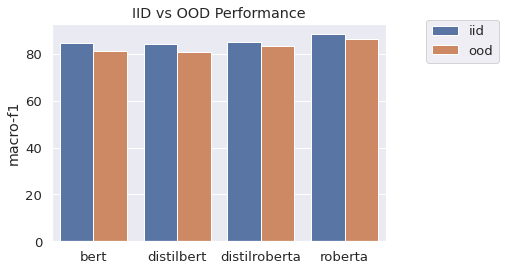

In [323]:
ax = sns.barplot(x="model", y="macro-f1", hue="distribution", data=df_one, alpha=1.0)
ax.legend(bbox_to_anchor=(1.1, 1.05))
ax.set_title("IID vs OOD Performance")
ax.set_xlabel(xlabel="")
# ax.set_ylabel(ylabel="")

In [300]:
df_one

,model,distribution,macro-f1
0,bert,iid,84.722500
1,bert,ood,81.392500
2,distilbert,iid,84.027500
3,distilbert,ood,80.600000
4,distilroberta,iid,84.965000
5,distilroberta,ood,83.353333
6,roberta,iid,88.402500
7,roberta,ood,86.341667


In [301]:
df_pd = pd.DataFrame(
    data={
        "model":model_name,
        "pd":prformance_drop
    }
)

Text(0.5, 1.0, 'Performance Drop')

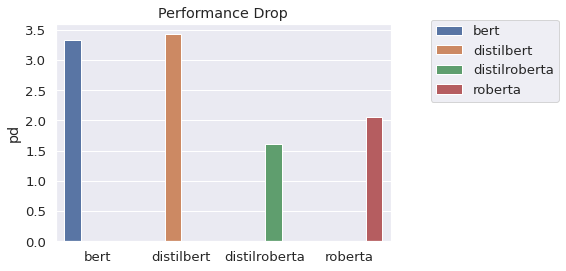

In [324]:
ax = sns.barplot(x='model', y='pd', data=df_pd, hue="model", alpha = 1.0)
ax.legend(bbox_to_anchor=(1.1, 1.05))
ax.set_xlabel(xlabel="")
# ax.set_ylabel(ylabel="")
ax.set_title("Performance Drop")

In [303]:
sns.barplot?

Signature:
sns.barplot(
    *,
    x=None,
    y=None,
    hue=None,
    data=None,
    order=None,
    hue_order=None,
    estimator=<function mean at 0x7f97cc077280>,
    ci=95,
    n_boot=1000,
    units=None,
    seed=None,
    orient=None,
    color=None,
    palette=None,
    saturation=0.75,
    errcolor='.26',
    errwidth=None,
    capsize=None,
    dodge=True,
    ax=None,
    **kwargs,
)
Docstring:
Show point estimates and confidence intervals as rectangular bars.

A bar plot represents an estimate of central tendency for a numeric
variable with the height of each rectangle and provides some indication of
the uncertainty around that estimate using error bars. Bar plots include 0
in the quantitative axis range, and they are a good choice when 0 is a
meaningful value for the quantitative variable, and you want to make
comparisons against it.

For datasets where 0 is not a meaningful value, a point plot will allow you
to focus on differences between levels of one or more catego